# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

## Read CSV Files

In [2]:
retract = pd.read_csv('./retract_feature_engineered_data.csv')
no_retract = pd.read_csv('./no_retract_feature_engineered_data.csv')
total = pd.read_csv('./total_feature_engineered_data.csv')

In [3]:
total.columns

Index(['Unnamed: 0', 'doi', 'year', 'month', 'day', 'volume', 'issue',
       'journal', 'title', 'text', 'abstract', 'keywords', 'retraction_binary',
       'unpacked_keywords', 'clean_text', 'clean_text_lem', 'keywords_binary',
       'num_words', 'character_length', 'animal_binary', 'animal_words',
       'iacuc', 'mouse', 'rat', 'murine', 'hamster', 'rabbit', 'cat', 'pig',
       'dog', 'ungulate', 'horse', 'donkey', 'goat', 'cow', 'chicken', 'sheep',
       'irb_binary', 'regulatory', 'review_binary', 'novel_idea',
       'flesch_reading_ease', 'flesch_kincaid_grade'],
      dtype='object')

In [4]:
total = total.drop(columns=['Unnamed: 0'])
no_retract = no_retract.drop(columns=['Unnamed: 0'])
retract = retract.drop(columns=['Unnamed: 0'])

In [5]:
total['year'] = total['year'].astype(str)
total['month'] = total['month'].astype(str)
total['day'] = total['day'].astype(str)
total['volume'] = total['volume'].astype(str)
total['issue'] = total['issue'].astype(str)

retract['year'] = retract['year'].astype(float)
retract['month'] = retract['month'].astype(float)
retract['day'] = retract['day'].astype(float)
retract['volume'] = retract['volume'].astype(float)
retract['issue'] = retract['issue'].astype(float)

no_retract['year'] = no_retract['year'].astype(float)
no_retract['month'] = no_retract['month'].astype(float)
no_retract['day'] = no_retract['day'].astype(float)
no_retract['volume'] = no_retract['volume'].astype(float)
no_retract['issue'] = no_retract['issue'].astype(float)

## Character Length

In [6]:
list_words = []
for i in range(0, len(retract['clean_text'])):
    list_words.append(len(retract['clean_text'][i]))
retract['character_length'] = list_words 

list_words = []
for i in range(0, len(no_retract['clean_text'])):
    list_words.append(len(no_retract['clean_text'][i]))
no_retract['character_length'] = list_words 

In [7]:
retract['character_length'].describe()

count    1.537000e+03
mean     6.305490e+04
std      1.593842e+05
min      3.500000e+01
25%      1.940000e+04
50%      3.272200e+04
75%      5.515200e+04
max      1.425053e+06
Name: character_length, dtype: float64

In [8]:
no_retract['character_length'].describe()

count      9082.000000
mean      49940.487668
std       26299.863599
min          39.000000
25%       32915.750000
50%       44820.000000
75%       60827.500000
max      614970.000000
Name: character_length, dtype: float64

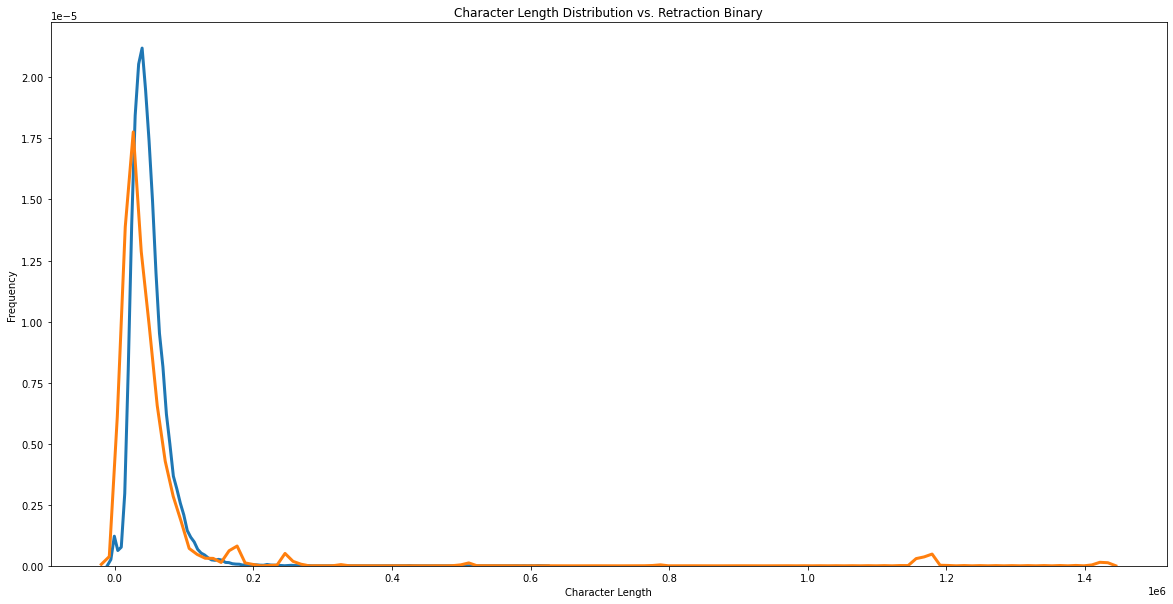

In [11]:
plt.figure(figsize=(20,10))
sns.distplot(no_retract['character_length'], hist=False, kde_kws={"linewidth":3})
sns.distplot(retract['character_length'], hist=False, kde_kws={"linewidth":3}).set(title = 'Character Length Distribution vs. Retraction Binary',
                                                                                     xlabel='Character Length', ylabel='Frequency');

## Word Count

In [12]:
list_words = []
for i in range(0, len(retract['clean_text'])):
    list_words.append(len(retract['clean_text'][i].split()))
retract['num_words'] = list_words

list_words = []
for i in range(0, len(no_retract['clean_text'])):
    list_words.append(len(no_retract['clean_text'][i].split()))
no_retract['num_words'] = list_words 

In [13]:
retract['num_words'].describe()

count      1537.000000
mean      10076.668185
std       25532.727862
min           6.000000
25%        3042.000000
50%        5152.000000
75%        8917.000000
max      230174.000000
Name: num_words, dtype: float64

In [14]:
no_retract['num_words'].describe()

count     9082.000000
mean      8031.523233
std       4274.592506
min          7.000000
25%       5241.250000
50%       7195.500000
75%       9828.750000
max      95881.000000
Name: num_words, dtype: float64

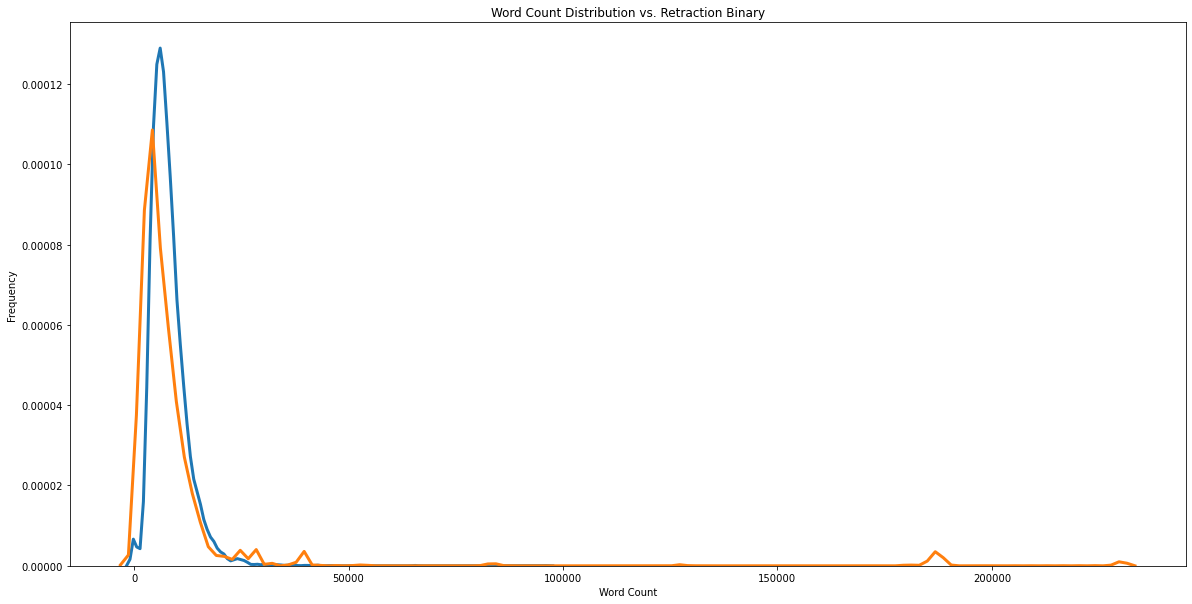

In [15]:
plt.figure(figsize=(20,10))
sns.distplot(no_retract['num_words'], hist=False, kde_kws={"linewidth":3});
sns.distplot(retract['num_words'], hist=False, kde_kws={"linewidth":3}).set(title = 'Word Count Distribution vs. Retraction Binary',
                                                                                     xlabel='Word Count', ylabel='Frequency');

## Correlation Coefficient Heatmap

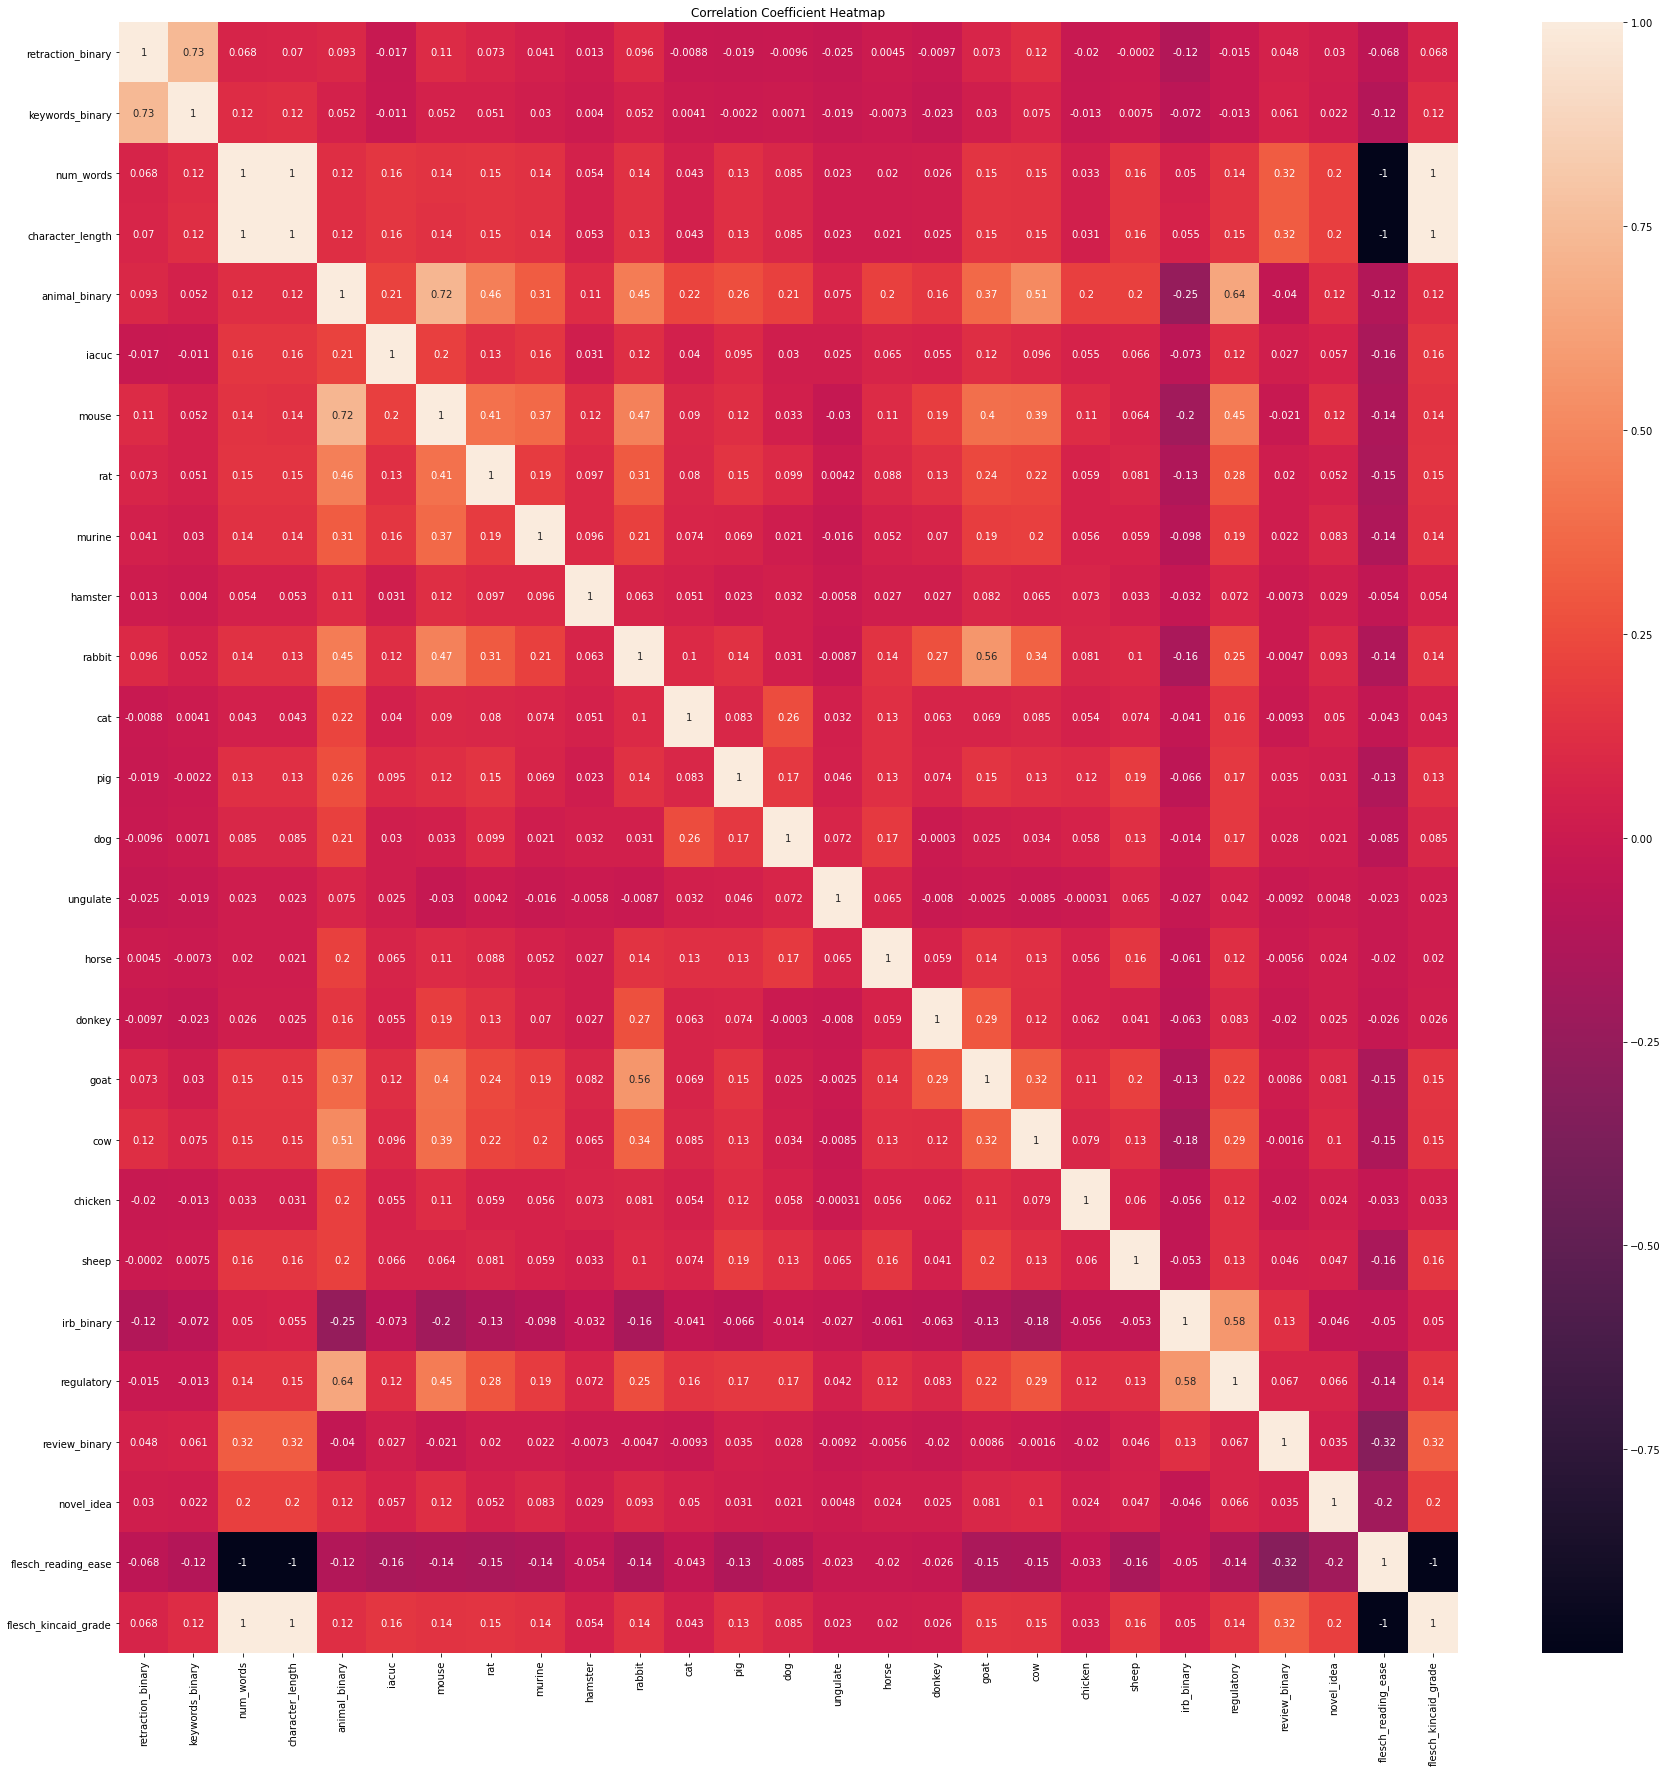

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(total.corr(), annot=True).set(title='Correlation Coefficient Heatmap');

## Keywords Barplots

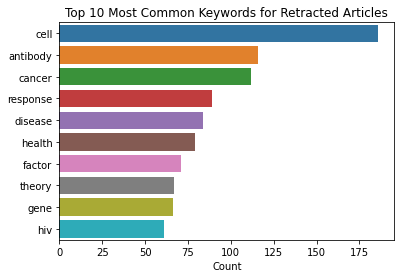

In [18]:
#Retraction data only
sns.barplot(y=['cell', 'antibody', 'cancer', 'response', 'disease', 'health', 'factor', 'theory', 'gene', 'hiv'],
           x = [186, 116, 112, 89, 84, 79, 71, 67, 66, 61], orient='h').set(title = 'Top 10 Most Common Keywords for Retracted Articles',
                                                                                     xlabel='Count');

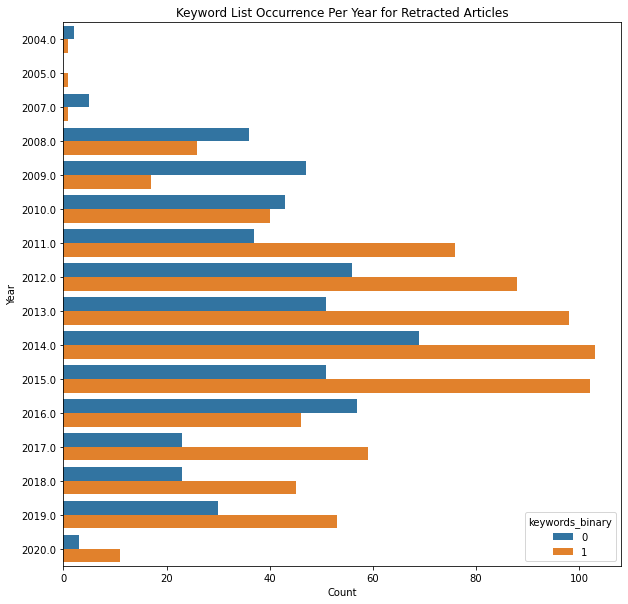

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(y = retract['year'], hue=retract['keywords_binary'], orient = 'h').set(title = 'Keyword List Occurrence Per Year for Retracted Articles',
                                                                                     xlabel='Count', ylabel='Year');

In [24]:
print(len(retract['keywords']))
retract['keywords'].value_counts().head(1)

1537


[]    647
Name: keywords, dtype: int64

## Year Barplots

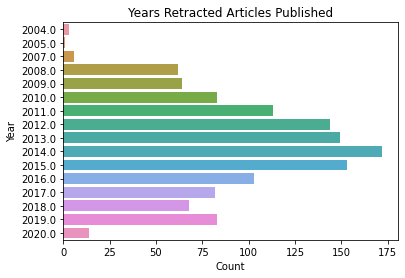

In [25]:
sns.countplot(y= retract['year'], orient='h').set(title = "Years Retracted Articles Published", ylabel = 'Year', 
                                                  xlabel = 'Count');

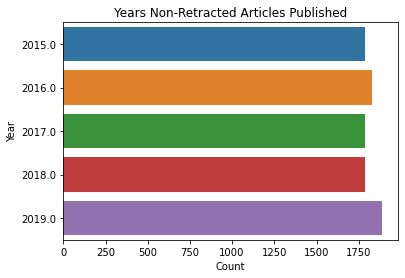

In [26]:
sns.countplot(y =no_retract['year'], orient='h').set(title = "Years Non-Retracted Articles Published", ylabel = 'Year', 
                                                  xlabel = 'Count');





Because of URL set up

## Month Barplots

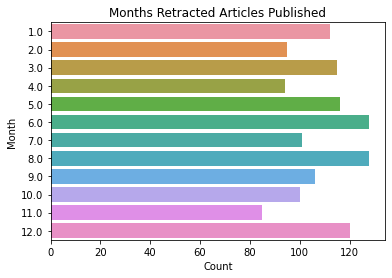

In [27]:
sns.countplot(y=retract['month'], orient='h').set(title = "Months Retracted Articles Published", ylabel = 'Month', 
                                                  xlabel = 'Count');

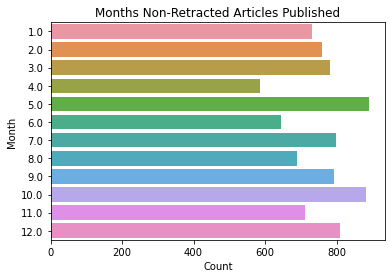

In [28]:
sns.countplot(y=no_retract['month'], orient='h').set(title = "Months Non-Retracted Articles Published", ylabel = 'Month', 
                                                  xlabel = 'Count');

## Day Barplots

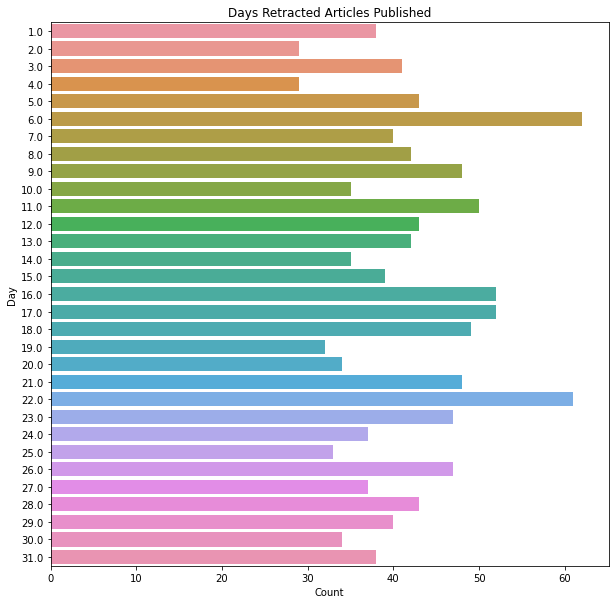

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(y=retract['day'], orient='h').set(title = "Days Retracted Articles Published", ylabel = 'Day', 
                                                  xlabel = 'Count');

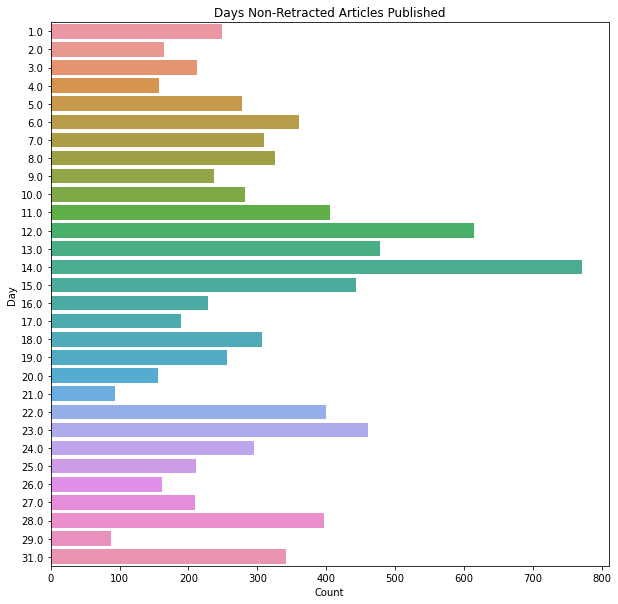

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(y=no_retract['day'], orient='h').set(title = "Days Non-Retracted Articles Published", ylabel = 'Day', 
                                                  xlabel = 'Count');

## Volume Barplots

In [31]:
retract['volume'].value_counts().head(11)

9.0      105
7.0      103
8.0       89
10.0      77
5.0       58
11.0      56
12.0      51
6.0       50
3.0       43
4.0       33
286.0     30
Name: volume, dtype: int64

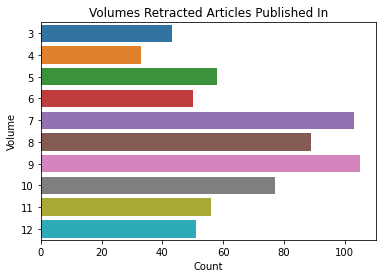

In [32]:
sns.barplot(y=[9, 7, 8, 10, 5, 11, 12, 6, 3, 4],
           x = [105, 103, 89, 77, 58, 56, 51, 50, 43, 33], orient='h').set(title = "Volumes Retracted Articles Published In", ylabel = 'Volume', 
                                                  xlabel = 'Count');

In [33]:
no_retract['volume'].value_counts().head(11)

14.0    1889
11.0    1830
10.0    1790
13.0    1787
12.0    1786
Name: volume, dtype: int64

## Issue Barplots

In [34]:
retract['issue'].value_counts().head(12)

1.0     173
3.0      89
4.0      86
2.0      84
6.0      79
5.0      77
7.0      47
8.0      45
10.0     41
12.0     40
11.0     31
9.0      30
Name: issue, dtype: int64

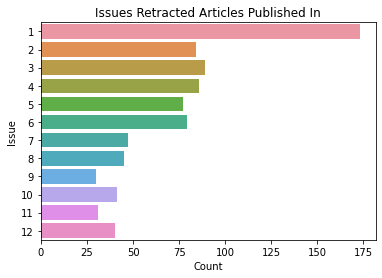

In [35]:
sns.barplot(y=[1, 3, 4, 2, 6, 5, 7, 8, 10, 12, 11, 9],
           x = [173, 89, 86, 84, 79, 77, 47, 45, 41, 40, 31, 30], orient='h').set(title = "Issues Retracted Articles Published In", ylabel = 'Issue', 
                                                  xlabel = 'Count');

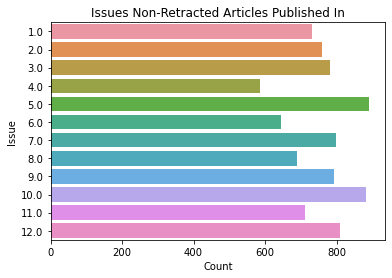

In [36]:
sns.countplot(y=no_retract['issue'], orient='h').set(title = "Issues Non-Retracted Articles Published In", ylabel = 'Issue', 
                                                  xlabel = 'Count');

## Animal Studies

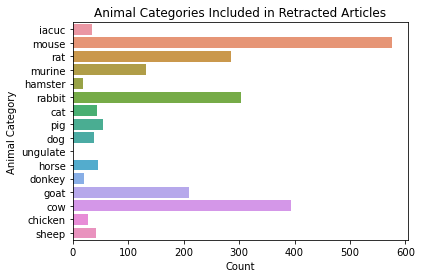

In [37]:
sns.barplot(y = ['iacuc', 'mouse', 'rat', 'murine', 'hamster', 'rabbit', 'cat', 'pig', 'dog', 'ungulate', 
                 'horse', 'donkey', 'goat', 'cow', 'chicken', 'sheep'], 
            x = [sum(retract['iacuc']), sum(retract['mouse']), sum(retract['rat']), sum(retract['murine']), 
                sum(retract['hamster']), sum(retract['rabbit']), sum(retract['cat']), sum(retract['pig']), sum(retract['dog']), 
                sum(retract['ungulate']), sum(retract['horse']), sum(retract['donkey']), sum(retract['goat']), 
                sum(retract['cow']), sum(retract['chicken']), sum(retract['sheep'])], orient = 'h').set(title = "Animal Categories Included in Retracted Articles", ylabel = 'Animal Category', 
                                                  xlabel = 'Count');

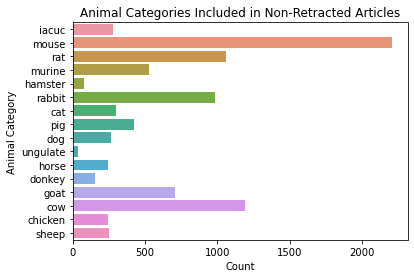

In [38]:
sns.barplot(y = ['iacuc', 'mouse', 'rat', 'murine', 'hamster', 'rabbit', 'cat', 'pig', 'dog', 'ungulate', 
                 'horse', 'donkey', 'goat', 'cow', 'chicken', 'sheep'], 
            x = [sum(no_retract['iacuc']), sum(no_retract['mouse']), sum(no_retract['rat']), 
                 sum(no_retract['murine']), sum(no_retract['hamster']), sum(no_retract['rabbit']), 
                 sum(no_retract['cat']), sum(no_retract['pig']), sum(no_retract['dog']), 
                sum(no_retract['ungulate']), sum(no_retract['horse']), sum(no_retract['donkey']), 
                 sum(no_retract['goat']), sum(no_retract['cow']), sum(no_retract['chicken']), 
                 sum(no_retract['sheep'])], orient = 'h').set(title = "Animal Categories Included in Non-Retracted Articles", ylabel = 'Animal Category', 
                                                  xlabel = 'Count');

## Journal Barplot of Retraction Data

In [39]:
retract['journal'].value_counts().head(10)

PloS one                                                                              229
The Journal of biological chemistry                                                   169
Diagnostic pathology                                                                   30
Acta crystallographica. Section E, Structure reports online                            28
Medicine                                                                               24
OncoTargets and therapy                                                                23
BioMed research international                                                          22
The Journal of neuroscience : the official journal of the Society for Neuroscience     19
European journal of medical research                                                   18
Evidence-based complementary and alternative medicine : eCAM                           15
Name: journal, dtype: int64

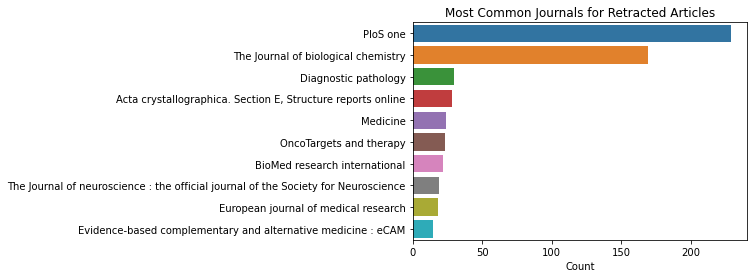

In [40]:
sns.barplot(y=['PloS one', 'The Journal of biological chemistry',
              'Diagnostic pathology', 'Acta crystallographica. Section E, Structure reports online',
              'Medicine', 'OncoTargets and therapy', 'BioMed research international',
              'The Journal of neuroscience : the official journal of the Society for Neuroscience',
              'European journal of medical research', 'Evidence-based complementary and alternative medicine : eCAM'],
           x = [229, 169, 30, 28, 24, 23, 22, 19, 18, 15], orient='h').set(title = "Most Common Journals for Retracted Articles",  
                                                  xlabel = 'Count');

## Text Readability

In [41]:
retract['flesch_reading_ease'].describe()

count      1537.000000
mean     -10163.970345
std       25915.387264
min     -233563.600000
25%       -8985.040000
50%       -5166.270000
75%       -3024.620000
max          81.290000
Name: flesch_reading_ease, dtype: float64

In [42]:
no_retract['flesch_reading_ease'].describe()

count     9082.000000
mean     -8087.809740
std       4337.544257
min     -97256.210000
25%      -9916.220000
50%      -7240.930000
75%      -5256.695000
max         64.370000
Name: flesch_reading_ease, dtype: float64

In [43]:
retract['flesch_kincaid_grade'].describe()

count     1537.000000
mean      3934.081132
std       9957.707227
min          3.700000
25%       1190.900000
50%       2013.800000
75%       3480.900000
max      89772.300000
Name: flesch_kincaid_grade, dtype: float64

In [44]:
no_retract['flesch_kincaid_grade'].describe()

count     9082.000000
mean      3136.599736
std       1666.924692
min          6.000000
25%       2048.825000
50%       2810.700000
75%       3838.500000
max      37398.100000
Name: flesch_kincaid_grade, dtype: float64

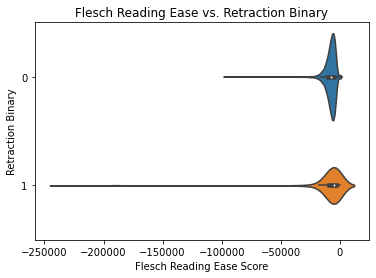

In [46]:
sns.violinplot(x = total['flesch_reading_ease'], y = total['retraction_binary'], orient='h').set(title = 'Flesch Reading Ease vs. Retraction Binary', 
                                                                                                xlabel = 'Flesch Reading Ease Score',
                                                                                                ylabel = 'Retraction Binary');

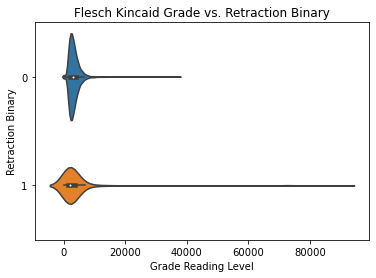

In [47]:
sns.violinplot(x = total['flesch_kincaid_grade'], y = total['retraction_binary'], orient='h').set(title = 'Flesch Kincaid Grade vs. Retraction Binary', 
                                                                                                xlabel = 'Grade Reading Level',
                                                                                                ylabel = 'Retraction Binary');